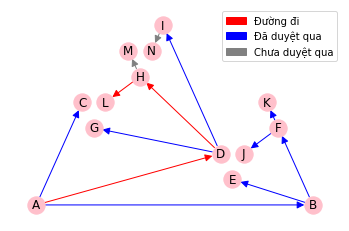

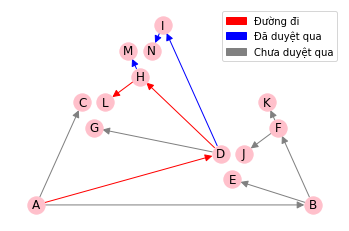

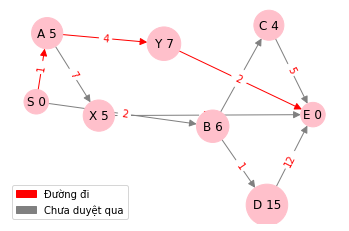

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import ast
import sys

#----------------------------------------BFS-------------------------------------#
orig_stdout = sys.stdout
sys.stdout = open('[Output] BFS_StepByStep.txt','wt')
print("BFS Step By Step")

def BFS_Path(graph,start,end, step):
    queue = [(start, [start])]
    visited = []
    while queue:
        print("\n------ Step " + str(step))
        node,path = queue.pop(0)  
        if path not in visited and len(path) > 1:
            visited.append(path) 
        print("Path: {}".format(path))
        print("\nXet Node: {}".format(node))
        if node == end:
                print("-> Tim thay end! Xuat ra duong di tu {} den {}".format(start,end))
                return [path,visited]
        print("Next Node: {}".format(graph[node]))
        print("Queue: {}\n".format(queue), end = "\n")
        for nextNode in graph[node]:
            print("- Xet node: {}".format(nextNode))
            if nextNode in path:
                continue
            else:
                pathNew = (nextNode, path+[nextNode])
                queue.append(pathNew)
                print("-> Add vao queue duong di toi {}: {} ".format(nextNode, path+[nextNode]))
        step += 1
#-------------------------------------------------------------------------------#
G = nx.DiGraph()
#Doc Graph
file = open("[Input] Graph_BFS-DFS.txt", "r")
contents = file.read()
graph= ast.literal_eval(contents)
file.close()


edge = []
root = ""
G.add_nodes_from(graph)
for x in graph:
    if root == "":
        root = x
    for node in graph[x]:
        edge.append((x, node))
G.add_edges_from(edge)
        
#Start & End
with open('[Input] Start_End.txt') as f:
    matrix=[line.split() for line in f]
start = matrix[0][1]
end = matrix[0][2]
result = BFS_Path(graph, start, end, 1)
print('\nPath: ', result[0])

pathResult = result[0]
visitedResult = result[1]

for e in G.edges():
    G[e[0]][e[1]]['color'] = 'grey'
for v in visitedResult:
    for i in range(len(v)-1):
        G[v[i]][v[i+1]]['color'] = 'blue'

for i in range(len(pathResult)-1):
    G[pathResult[i]][pathResult[i+1]]['color'] = 'red'    

red_patch = mpatches.Patch(color='red', label='Đường đi')
blue_patch = mpatches.Patch(color='blue', label='Đã duyệt qua')
grey_patch = mpatches.Patch(color='grey', label='Chưa duyệt qua')
plt.legend(handles=[red_patch, blue_patch, grey_patch])


edge_colors = [G[e[0]][e[1]]['color'] for e in G.edges()]
nx.draw_planar(G, with_labels=True, edge_color=edge_colors, arrows=True, arrowsize=15,node_color='pink')
plt.savefig("[Output] BFS_Graph.png")
plt.show()
sys.stdout.close()
sys.stdout=orig_stdout

#----------------------------------------DFS-------------------------------------#
sys.stdout = open('[Output] DFS_StepByStep.txt','wt')
print("DFS Step By Step")

def DFS_Path(graph,start,end, step):
    stack = [(start, [start])]
    visited = []
    while stack:
        print("\n------ Step " + str(step))
        node,path =  stack.pop() 
        if path not in visited and len(path) > 1:
                    visited.append(path)
        print("Path: {}".format(path))
        print("\nXet Node: {}".format(node))
        if node == end:
                print("-> Tim thay end! Xuat ra duong di tu {} den {}".format(start,end))
                return [path,visited]
        print("Next Node: {}".format(graph[node]))
        print("Stack: {}\n".format(stack), end = "\n")
        for nextNode in graph[node]:
            print("- Xet node: {}".format(nextNode))
            if nextNode in path:
                continue
            else:
                stack.append((nextNode, path+[nextNode]))
                print("-> Add vao stack duong di toi {}: {} ".format(nextNode, path+[nextNode]))
        step += 1
#-------------------------------------------------------------------------------#
G = nx.DiGraph()

#Doc Graph
file = open("[Input] Graph_BFS-DFS.txt", "r")
contents = file.read()
graph= ast.literal_eval(contents)
file.close()

edge = []
root = ""
G.add_nodes_from(graph)
for x in graph:
    if root == "":
        root = x
    for node in graph[x]:
        edge.append((x, node))
G.add_edges_from(edge)
        
#Start & End
with open('[Input] Start_End.txt') as f:
    matrix=[line.split() for line in f]
start = matrix[1][1]
end = matrix[1][2]

result = DFS_Path(graph, start, end, 1)
pathResult = result[0]
print('\nPath: ', pathResult)
visitedResult = result[1]

for e in G.edges():
    G[e[0]][e[1]]['color'] = 'grey'
for v in visitedResult:
    for i in range(len(v)-1):
        G[v[i]][v[i+1]]['color'] = 'blue'
for i in range(len(pathResult)-1):
    G[pathResult[i]][pathResult[i+1]]['color'] = 'red'    

red_patch = mpatches.Patch(color='red', label='Đường đi')
blue_patch = mpatches.Patch(color='blue', label='Đã duyệt qua')
grey_patch = mpatches.Patch(color='grey', label='Chưa duyệt qua')
plt.legend(handles=[red_patch, blue_patch, grey_patch])

edge_colors = [G[e[0]][e[1]]['color'] for e in G.edges()]
nx.draw_planar(G, with_labels=True, edge_color=edge_colors, arrows=True, arrowsize=15, node_color='pink')
plt.savefig("[Output] DFS_Graph.png")
plt.show()
sys.stdout.close()
sys.stdout=orig_stdout

#----------------------------------------AStar-------------------------------------#
sys.stdout = open('[Output] AStar_StepByStep.txt','wt')
print("AStar Step By Step")

class Graph:
    def __init__ (self, adjacency_list, H):
        self.adjacency_list = adjacency_list
        self.H = H
    def get_neighbors(self, v):
        return adjacency_list[v]
    def h(self, n):
        return H[n]
    def a_star_algorithm(self, start_node, end_node, step):
        open_list = set([start_node])
        closed_list = set([])
        g = {}
        g[start_node] = 0
        parents = {}
        parents[start_node] = start_node
        while open_list:
            print("\n------ Step {}".format(step))
            print("Open = {}".format(open_list))
            print("Closed = {}".format(closed_list))
            
            n = None
            for v in open_list:
                print("- {}: {} ".format(v, g[v] + self.h(v))) 
                if n == None or (g[v] + self.h(v) < g[n] + self.h(n)):
                    n = v
            print("-> Chon {}".format(n))
            if n == None:
                print("\nKhong tim thay duong di")
                return None
            if n == end_node:
                print("! Tim thay duong di !")
                path=[]
                while parents[n] != n:
                    path.append(n)
                    n = parents[n] 
                path.append(start_node)
                path.reverse()
                print("\nPath: {}".format(path))    
                return path
            for(m, cost) in self.get_neighbors(n):
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    print("Neighbor: {} -> Add vao Open".format(m))
                    parents[m] = n
                    g[m] = g[n] + cost
                else:
                    if g[m] > g[n] + cost:
                        print("{} > {}".format(g[m], g[n] + cost))
                        g[m] = g[n] + cost
                        parents[m] = n
                        if m in closed_list:
                            print("Quay lai")
                            closed_list.remove(m)
                            open_list.add(m)
            open_list.remove(n)
            closed_list.add(n)
            step += 1
        print("Duong di khong ton tai")
        return None
#-------------------------------------------------------------------------------#

#Doc Graph
file = open("[Input] Graph_AStar-AdjList.txt", "r")
contents = file.read()
adjacency_list = ast.literal_eval(contents)
file.close()
file = open("[Input] Graph_AStar-Weight.txt", "r")
contents = file.read()
H = ast.literal_eval(contents)
file.close()

#Start & End
with open('[Input] Start_End.txt') as f:
    matrix=[line.split() for line in f]
start = matrix[2][1]
end = matrix[2][2]
graph1 = Graph(adjacency_list, H)
pathResult = graph1.a_star_algorithm(start, end, 1)

#Chay
edge_labels={}
edges = []
for edge in adjacency_list:
    for e in adjacency_list[edge]:
        edges.append([edge, e[0]])
        edge_labels[(edge, e[0])] = e[1]
G = nx.DiGraph()
G.add_edges_from(edges)
plt.figure()  

red_patch = mpatches.Patch(color='red', label='Đường đi')
grey_patch = mpatches.Patch(color='grey', label='Chưa duyệt qua')
plt.legend(handles=[red_patch, grey_patch])

edge_colors = ['red' if e[0] in pathResult and e[1] in pathResult  else 'grey' for e in G.edges]

pos = nx.spring_layout(G)
nx.draw(G,pos,node_color='pink', edge_color = edge_colors, labels={node:node + ' ' + str(H[node]) for node in G.nodes()}, node_size =[int(H[node])*75 + 600 for node in G.nodes()], arrows=True, arrowsize=15)
nx.draw_networkx_edge_labels(G,pos,edge_labels,font_color='red')
plt.axis('off')
plt.savefig("[Output] AStar_Graph.png")
plt.show()
sys.stdout.close()
sys.stdout=orig_stdout